<a href="https://colab.research.google.com/github/jul1andav1d/Practice-and-Exercises/blob/main/Analysis_of_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusters Analysis

#Task

1. Make bar graphs of the means of each feature for each cluster created.  For each plot the X axis should be the clusters and the y axis should be the mean values for each feature.

2. Write a description of each cluster, based on the graphs and tables created.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/DataSci Week 9 Unpervised Learning: Clustering/cust_seg.csv')
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


Checking for duplicated rows and missing values:

In [ ]:
print('Number of Duplicated Rows', df.duplicated().sum())

Number of Duplicated Rows 0


In [ ]:
df.isna().any()

Unnamed: 0         False
Customer Id        False
Age                False
Edu                False
Years Employed     False
Income             False
Card Debt          False
Other Debt         False
Defaulted           True
DebtIncomeRatio    False
dtype: bool

In [ ]:
df.dropna(inplace = True)

In [ ]:
print('Number of Missing Values', df.isna().any().sum());

Number of Missing Values 0


In [ ]:
x = df[['Age', 'Edu', 'Years Employed', 'Income', 
        'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']]

Scaling the data

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(x)

Now let's define a range of values for k to evaluate inertia score
At the same time fit the model and run it to plot the results

* Elbow plot of intertia:

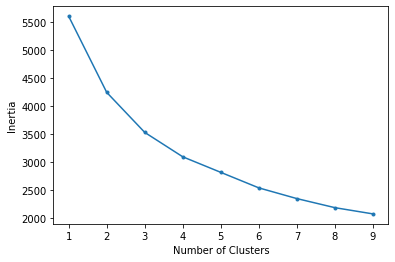

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
  model =KMeans(n_clusters = k)
  model.fit(scaled_df)
  inertias.append(model.inertia_)

plt.plot(ks, inertias, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In the graph above, we can see the line starts to level off between 2 - 3 clusters. 

* Slhouette score for KMeans:

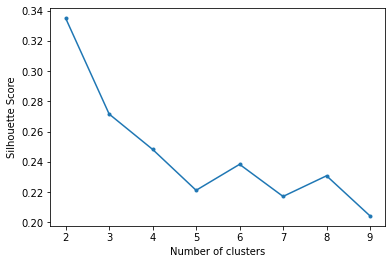

In [ ]:
silhouette_scores = []
for i in range(2,10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

plt.plot(range(2,10), silhouette_scores, marker = '.')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score');

Based on the results above, the ideal number for K would be 2. It has the highest silhouette score, and the elbow plot showed a level off around the same value.

#Analyzing clusters:

Now let's refit KMeans with 2 clusters.

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(scaled_df)

#add clusters as a column, (add clusters to the 'x' dataframe, 
#not 'df' as we want to work only on the selected customer segmentation.)

x['cluster'] = kmeans.labels_
x.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


#Visualizing the data:

Grouping the dataframe by clusters and aggregating by mean values

In [ ]:
cluster_groups = x.groupby('cluster', as_index = False).mean()
cluster_groups.head()

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,41.855346,1.955975,15.503145,88.238994,3.886994,7.257063,0.301887,14.754717
1,1,32.804067,1.654344,6.297597,33.070240,0.867771,1.824148,0.249538,8.939741


Visualizing the clusters:

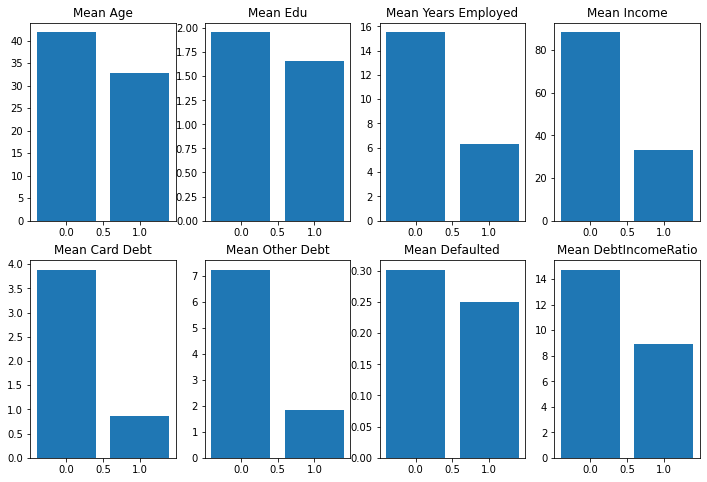

In [ ]:
fgi, axes = plt.subplots(2,4, figsize = (12,8))
axes = axes.ravel()

#loop over columns and plot each separte figure skipping 'cluster' column

for i,col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

#Cluster 0:

Cluster 0 has the higher values on the average for all the variables, only for the age, education, or defaulted would make them kind of similar to each other. But there's is a very noticeable difference between both clusters. Cluster 0 has more customer employed than Cluster 1. Same as a higher income compared to the other cluster. We could say this cluster has older customers, with more of a settle employment situation, more credit utilization and since they have higher education, they also earn more.

#Cluster 1:

Cluster one has the lowest debt, lowest income, and a pronounced lower average of years of employment. The education, Age and defaulted variables are fairly similiar to each other but with a clear differenciation. It seems like this cluster has the younger people, with a couple years of education and barely joining the labor market. Same as very new to credit utilization, and with an income more on the lower side of the equation.